# The problem
Employee Absenteeism
Absenteeism is an employee's intentional or habitual absence from work. While employers expect workers to miss a certain number of workdays each year, excessive absences can equate to decreased productivity and can have a major effect on company finances, morale and other factors. 
This datatale is intended to look at the causes of absenteeism, the costs of lost productivity and what employers can do to reduce absenteeism rates in the workplace.

In the end, we would also look at predicting who might resort to absenteeism in the future

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import chi2_contingency

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [4]:
absentism_data =  pd.read_excel(r'F:\Datasets\end_to_end_data_sets\end to end data sets\Absenteeism_at_work.xls')


In [5]:
# Glance at the data
pd.set_option('display.max_columns',30)
absentism_data.head(5)-

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


# Data Description :-
ID: Individual identification (ID)
Reason for absence: Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

    I Certain infectious and parasitic diseases
    II Neoplasms
    III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
    IV Endocrine, nutritional and metabolic diseases
    V Mental and behavioural disorders
    VI Diseases of the nervous system
    VII Diseases of the eye and adnexa
    VIII Diseases of the ear and mastoid process
    IX Diseases of the circulatory system
    X Diseases of the respiratory system
    XI Diseases of the digestive system
    XII Diseases of the skin and subcutaneous tissue
    XIII Diseases of the musculoskeletal system and connective tissue
    XIV Diseases of the genitourinary system
    XV Pregnancy, childbirth and the puerperium
    XVI Certain conditions originating in the perinatal period
    XVII Congenital malformations, deformations and chromosomal abnormalities
    XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
    XIX Injury, poisoning and certain other consequences of external causes
    XX External causes of morbidity and mortality
    XXI Factors influencing health status and contact with health services.
    And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).

    Month of absence
    Day of the week ( Saturday(0), Sunday(1), Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
    Seasons (summer (1), autumn (2), winter (3), spring (4))
    Transportation expense
    Distance from Residence to Work (kilometers)
    Service time
    Age
    Work load Average/day
    Hit target
    Disciplinary failure (yes=1; no=0)
    Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
    Son (number of children)
    Social drinker (yes=1; no=0)
    Social smoker (yes=1; no=0)
    Pet (number of pet)
    Weight
    Height
    Body mass index
    Absenteeism time in hours (target)
    Data understanding is a very important step in any data science problem. Before we even get to modeling, a first glance at what each feature does gives an intuition of how it effects our target. Now that you have gone through the feature descriptions, what features do you think effect absenteeism the most?


In [6]:
absentism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [7]:
# Renaming Columns
absentism_data.columns = ['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense','Distance_from_Residence_to_Work', 'Service_time', 'Age',
       'Work_load_Average_day', 'Hit_target', 'Disciplinary_failure','Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet',
       'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours']

In [8]:
absentism_data.Work_load_Average_day.value_counts()

222196    36
264249    33
237656    32
343253    29
265017    28
284853    25
308593    24
268519    23
284031    22
244387    22
241476    22
205917    21
251818    21
326452    20
246288    20
230290    20
236629    19
275089    19
239554    19
253957    19
294217    19
306345    18
253465    18
302585    18
265615    18
378884    16
246074    16
377550    16
275312    16
313532    15
261306    15
280549    15
249797    15
239409    13
261756    12
264604    12
330061    11
271219     3
Name: Work_load_Average_day, dtype: int64

In [9]:
# Removing Observations with 'Absenteeism time in hours' equal to zero
absentism = absentism_data.loc[absentism_data['Absenteeism_time_in_hours']!= 0,:]
absentism.shape

(696, 21)

In [10]:
# Let us see how many obeservations are being dropped
(absentism_data.shape[0] - absentism.shape[0]) / len(absentism_data) * 100

5.9459459459459465

In [11]:
absentism.head()


,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2


In [12]:
#absentism.isna().sum()
Missing_Value = pd.DataFrame((absentism.isna().sum()/len(absentism_data)*100))

Missing_Value.reset_index()
Missing_Value = Missing_Value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
Missing_Value = Missing_Value.sort_values('Missing_percentage', ascending = False)
Missing_Value

,Missing_percentage
ID,0.0
Disciplinary_failure,0.0
Body_mass_index,0.0
Height,0.0
Weight,0.0
Pet,0.0
Social_smoker,0.0
Social_drinker,0.0
Son,0.0
Education,0.0


In [13]:
cont_names = ['Weight','Distance_from_Residence_to_Work','Service_time','Transportation_expense','Work_load_Average_day','Absenteeism_time_in_hours','Height','Body_mass_index','Age','Hit_target']

In [16]:
def visualize_box_plot(df,cols):
    n = 0
    this = []
    n_rows = 5
    n_cols = 2
    width  = 20
    height = 20
    
    for column in df[cols]:
        this.append(column)
        
    
    fig, ax = plt.subplots(n_rows, n_cols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(n_rows):
        for col in range(n_cols):
            g = sns.boxplot(df[this[n]], ax = ax[row][col])
            
            ax[row,col].set_title("Column Name: {}".format(this[n]))
            ax[row,col].set_xlabel("")
            ax[row,col].set_ylabel("")
            n += 1
    plt.show()
    return

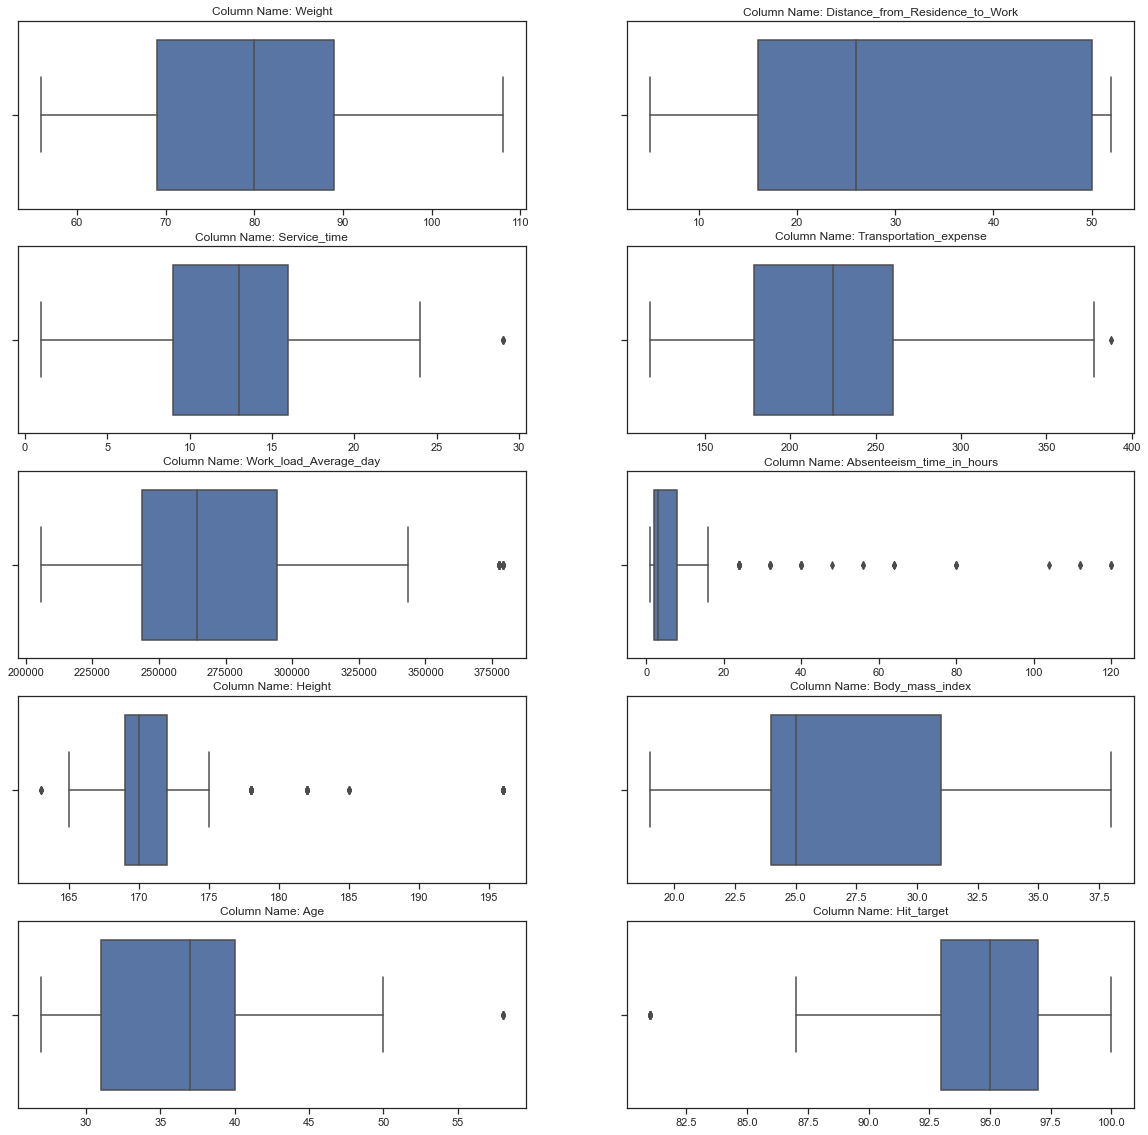

In [17]:
visualize_box_plot(absentism , cont_names)

# Finding out outliers through Inter-Quartile Range(IQR) method.
We need to find out the first Quartile(25%) and the third quartile(75%) and get the range of values. The values which are below or above it are treated as 'Outliers'.

In [18]:
for i in cont_names:
    q75, q25 = np.percentile(absentism_data.loc[:,i], [75,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
    print("Min value : ",minn)
    print("Max value : ",maxx)
    print('{var}----> {X} Outliers \n'.format(var = i, X = (absentism_data.loc[absentism_data.loc[:,i] < minn, i].count() + absentism_data.loc[absentism_data.loc[:,i] > maxx,i].count())))
    

Min value :  39.0
Max value :  119.0
Weight----> 0 Outliers 

Min value :  -35.0
Max value :  101.0
Distance_from_Residence_to_Work----> 0 Outliers 

Min value :  -1.5
Max value :  26.5
Service_time----> 5 Outliers 

Min value :  57.5
Max value :  381.5
Transportation_expense----> 3 Outliers 

Min value :  169642.0
Max value :  368962.0
Work_load_Average_day----> 32 Outliers 

Min value :  -7.0
Max value :  17.0
Absenteeism_time_in_hours----> 44 Outliers 

Min value :  164.5
Max value :  176.5
Height----> 119 Outliers 

Min value :  13.5
Max value :  41.5
Body_mass_index----> 0 Outliers 

Min value :  17.5
Max value :  53.5
Age----> 8 Outliers 

Min value :  87.0
Max value :  103.0
Hit_target----> 19 Outliers 



In [19]:
def visualize_plot(df,cols):
    n = 0
    this = []
    n_rows = 5
    n_cols = 2
    width  = 20
    height = 20
    
    for column in df[cols]:
        this.append(column)
        
    
    fig, ax = plt.subplots(n_rows, n_cols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(n_rows):
        for col in range(n_cols):
            g = sns.distplot(df[this[n]], ax = ax[row][col])
            
            ax[row,col].set_title("Column Name: {}".format(this[n]))
            ax[row,col].set_xlabel("")
            ax[row,col].set_ylabel("")
            n += 1
    plt.show()
    return

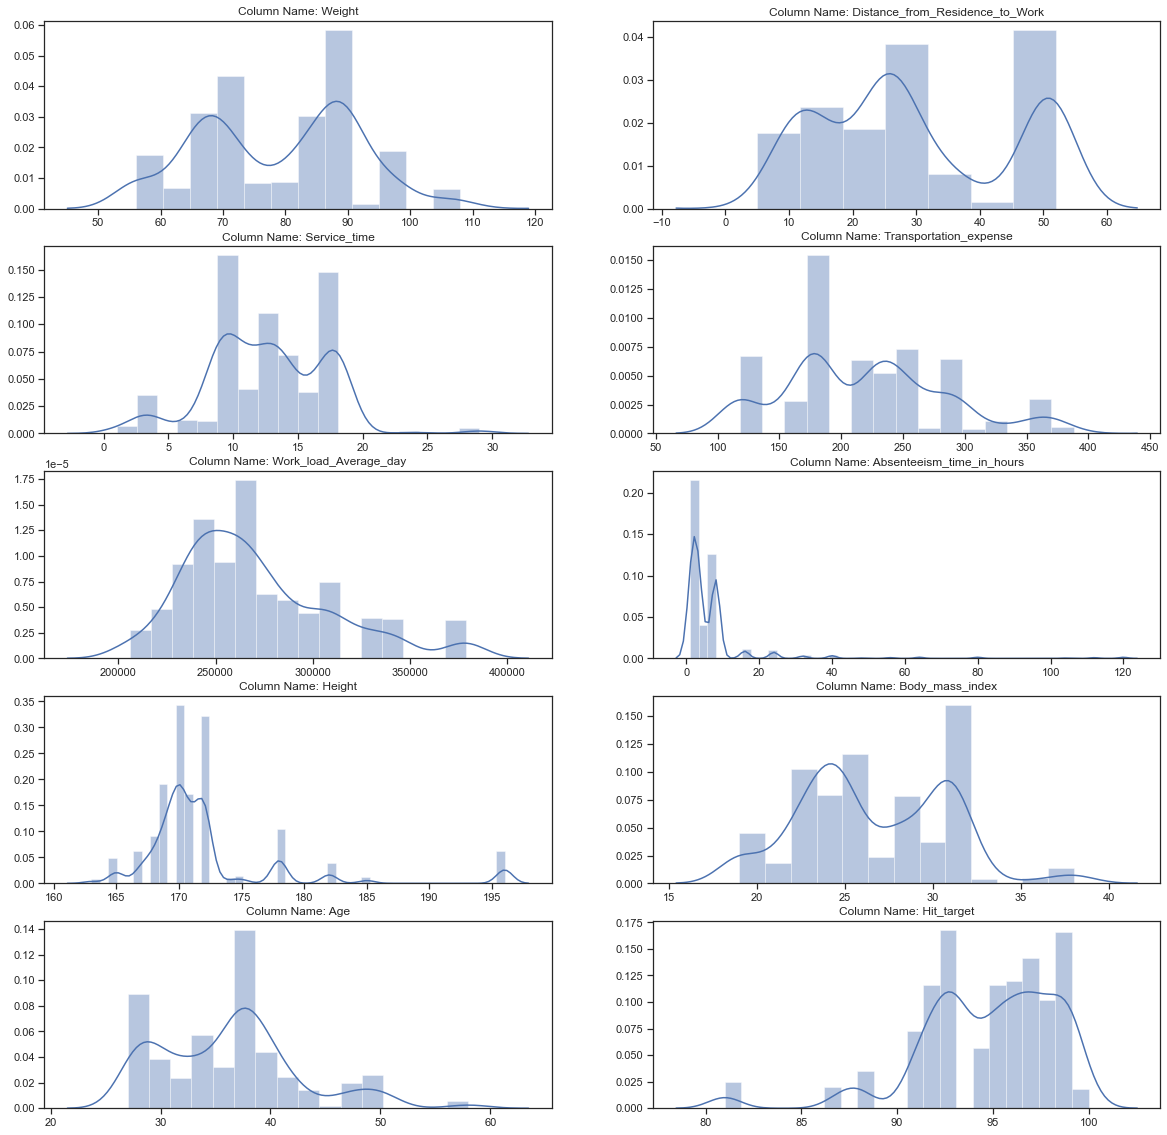

In [20]:
visualize_plot(absentism,cont_names)

We can observe from the figures that data follows skewed distribution.

# Statistical Analysis

# Chi-Square Test

Chi-Square Test is used in testing hypothesis. For Chi-Square Test, we make use of categorical variables.

Features being independent to each other is a "Null Hypothesis" and if they are dependent to each other an "Alternate Hypothesis".

In [21]:
catnames = ['Day_of_the_week','Seasons','Month_of_absence','Social_drinker','Reason_for_absence','Social_smoker','Pet','Son',
'Disciplinary_failure','Education']

In [22]:
factors_paired = [(i,j) for i in catnames for j in catnames] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(absentism[f[0]], absentism[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((10,10))
p1 = pd.DataFrame(p1, index=catnames, columns=catnames)
p1

,Day_of_the_week,Seasons,Month_of_absence,Social_drinker,Reason_for_absence,Social_smoker,Pet,Son,Disciplinary_failure,Education
Day_of_the_week,0.000000e+00,4.086874e-01,6.765307e-01,3.040911e-01,5.170971e-02,5.388357e-01,4.012904e-01,1.889736e-09,1.0,6.369421e-01
Seasons,4.086874e-01,0.000000e+00,0.000000e+00,1.473154e-01,6.493726e-19,6.615252e-02,1.090705e-04,1.795308e-05,1.0,8.936680e-02
Month_of_absence,6.765307e-01,0.000000e+00,0.000000e+00,3.040382e-02,2.191275e-14,1.838631e-02,6.376062e-05,4.226723e-05,1.0,8.873931e-03
Social_drinker,3.040911e-01,1.473154e-01,3.040382e-02,0.000000e+00,2.253390e-08,1.031400e-02,1.303426e-26,4.393599e-09,1.0,1.426601e-33
Reason_for_absence,5.170971e-02,6.493726e-19,2.191275e-14,2.253390e-08,0.000000e+00,1.742354e-09,1.386394e-18,1.788850e-19,1.0,1.895058e-10
Social_smoker,5.388357e-01,6.615252e-02,1.838631e-02,1.031400e-02,1.742354e-09,0.000000e+00,6.587414e-14,2.868110e-20,1.0,5.635243e-26
Pet,4.012904e-01,1.090705e-04,6.376062e-05,1.303426e-26,1.386394e-18,6.587414e-14,0.000000e+00,8.122222e-90,1.0,3.323522e-29
Son,1.889736e-09,1.795308e-05,4.226723e-05,4.393599e-09,1.788850e-19,2.868110e-20,8.122222e-90,0.000000e+00,1.0,8.888863e-12
Disciplinary_failure,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00
Education,6.369421e-01,8.936680e-02,8.873931e-03,1.426601e-33,1.895058e-10,5.635243e-26,3.323522e-29,8.888863e-12,1.0,0.000000e+00


# Observations from above Contigency Table:-
The Level of Significance is in the range(0.01 to 0.05). The features 'Seasons' ,'Reason_for_absence','Pet','Son' and 'Education' fall in the Rejection Region as their Level of significance doesn't belong to the range.

Inorder to find out the critical value , we need to find out the degrees of freedom = (noofrows - 1) (noofcols - 1) i.e ( 10 - 1) ( 10 -1 ) = 81 and the critical value comes up to 61.261.

Thus, the critical value obtained is 61.261. This is the value that the test-statistic must exceed inorder to the null hypothesis to get rejected i.e the absolute value of t-statistic must be 61.261 or greater.

# Correlation Analysis

Inorder to find correlation among the continuous variables we find the correlation among them using a heatmap.

In [24]:
absentism.shape

(696, 21)

In [25]:
corr = absentism[absentism.columns].corr()
corr.head()


,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
ID,1.000000,-0.082239,0.001350,0.037993,0.098344,-0.218650,-0.513676,-0.293064,0.025402,0.106659,0.007767,NaN,-0.031055,0.010626,-0.469789,0.002811,-0.022132,-0.261251,0.046235,-0.303154,-0.017577
Reason_for_absence,-0.082239,1.000000,-0.051632,0.139780,-0.049309,-0.082326,0.166834,0.063563,-0.012952,-0.135910,0.011565,NaN,-0.102716,-0.015184,0.121221,-0.071135,-0.029914,0.061504,-0.106396,0.116443,-0.300813
Month_of_absence,0.001350,-0.051632,1.000000,-0.004435,0.396522,0.130296,-0.005061,-0.060860,0.003033,-0.173712,-0.458745,NaN,-0.059851,0.071349,0.042514,-0.049586,0.074547,0.019309,-0.069368,0.047585,0.033875
Day_of_the_week,0.037993,0.139780,-0.004435,1.000000,0.049012,0.035570,0.118194,0.006891,-0.012138,0.018928,0.035371,NaN,0.059631,0.103492,0.038277,0.026839,-0.014858,-0.150461,-0.085867,-0.125316,-0.130839
Seasons,0.098344,-0.049309,0.396522,0.049012,1.000000,0.018140,-0.055463,-0.006818,-0.026869,0.164882,-0.047721,NaN,0.005660,0.039101,-0.050597,-0.080228,0.021174,-0.035183,-0.038188,-0.017491,0.012429


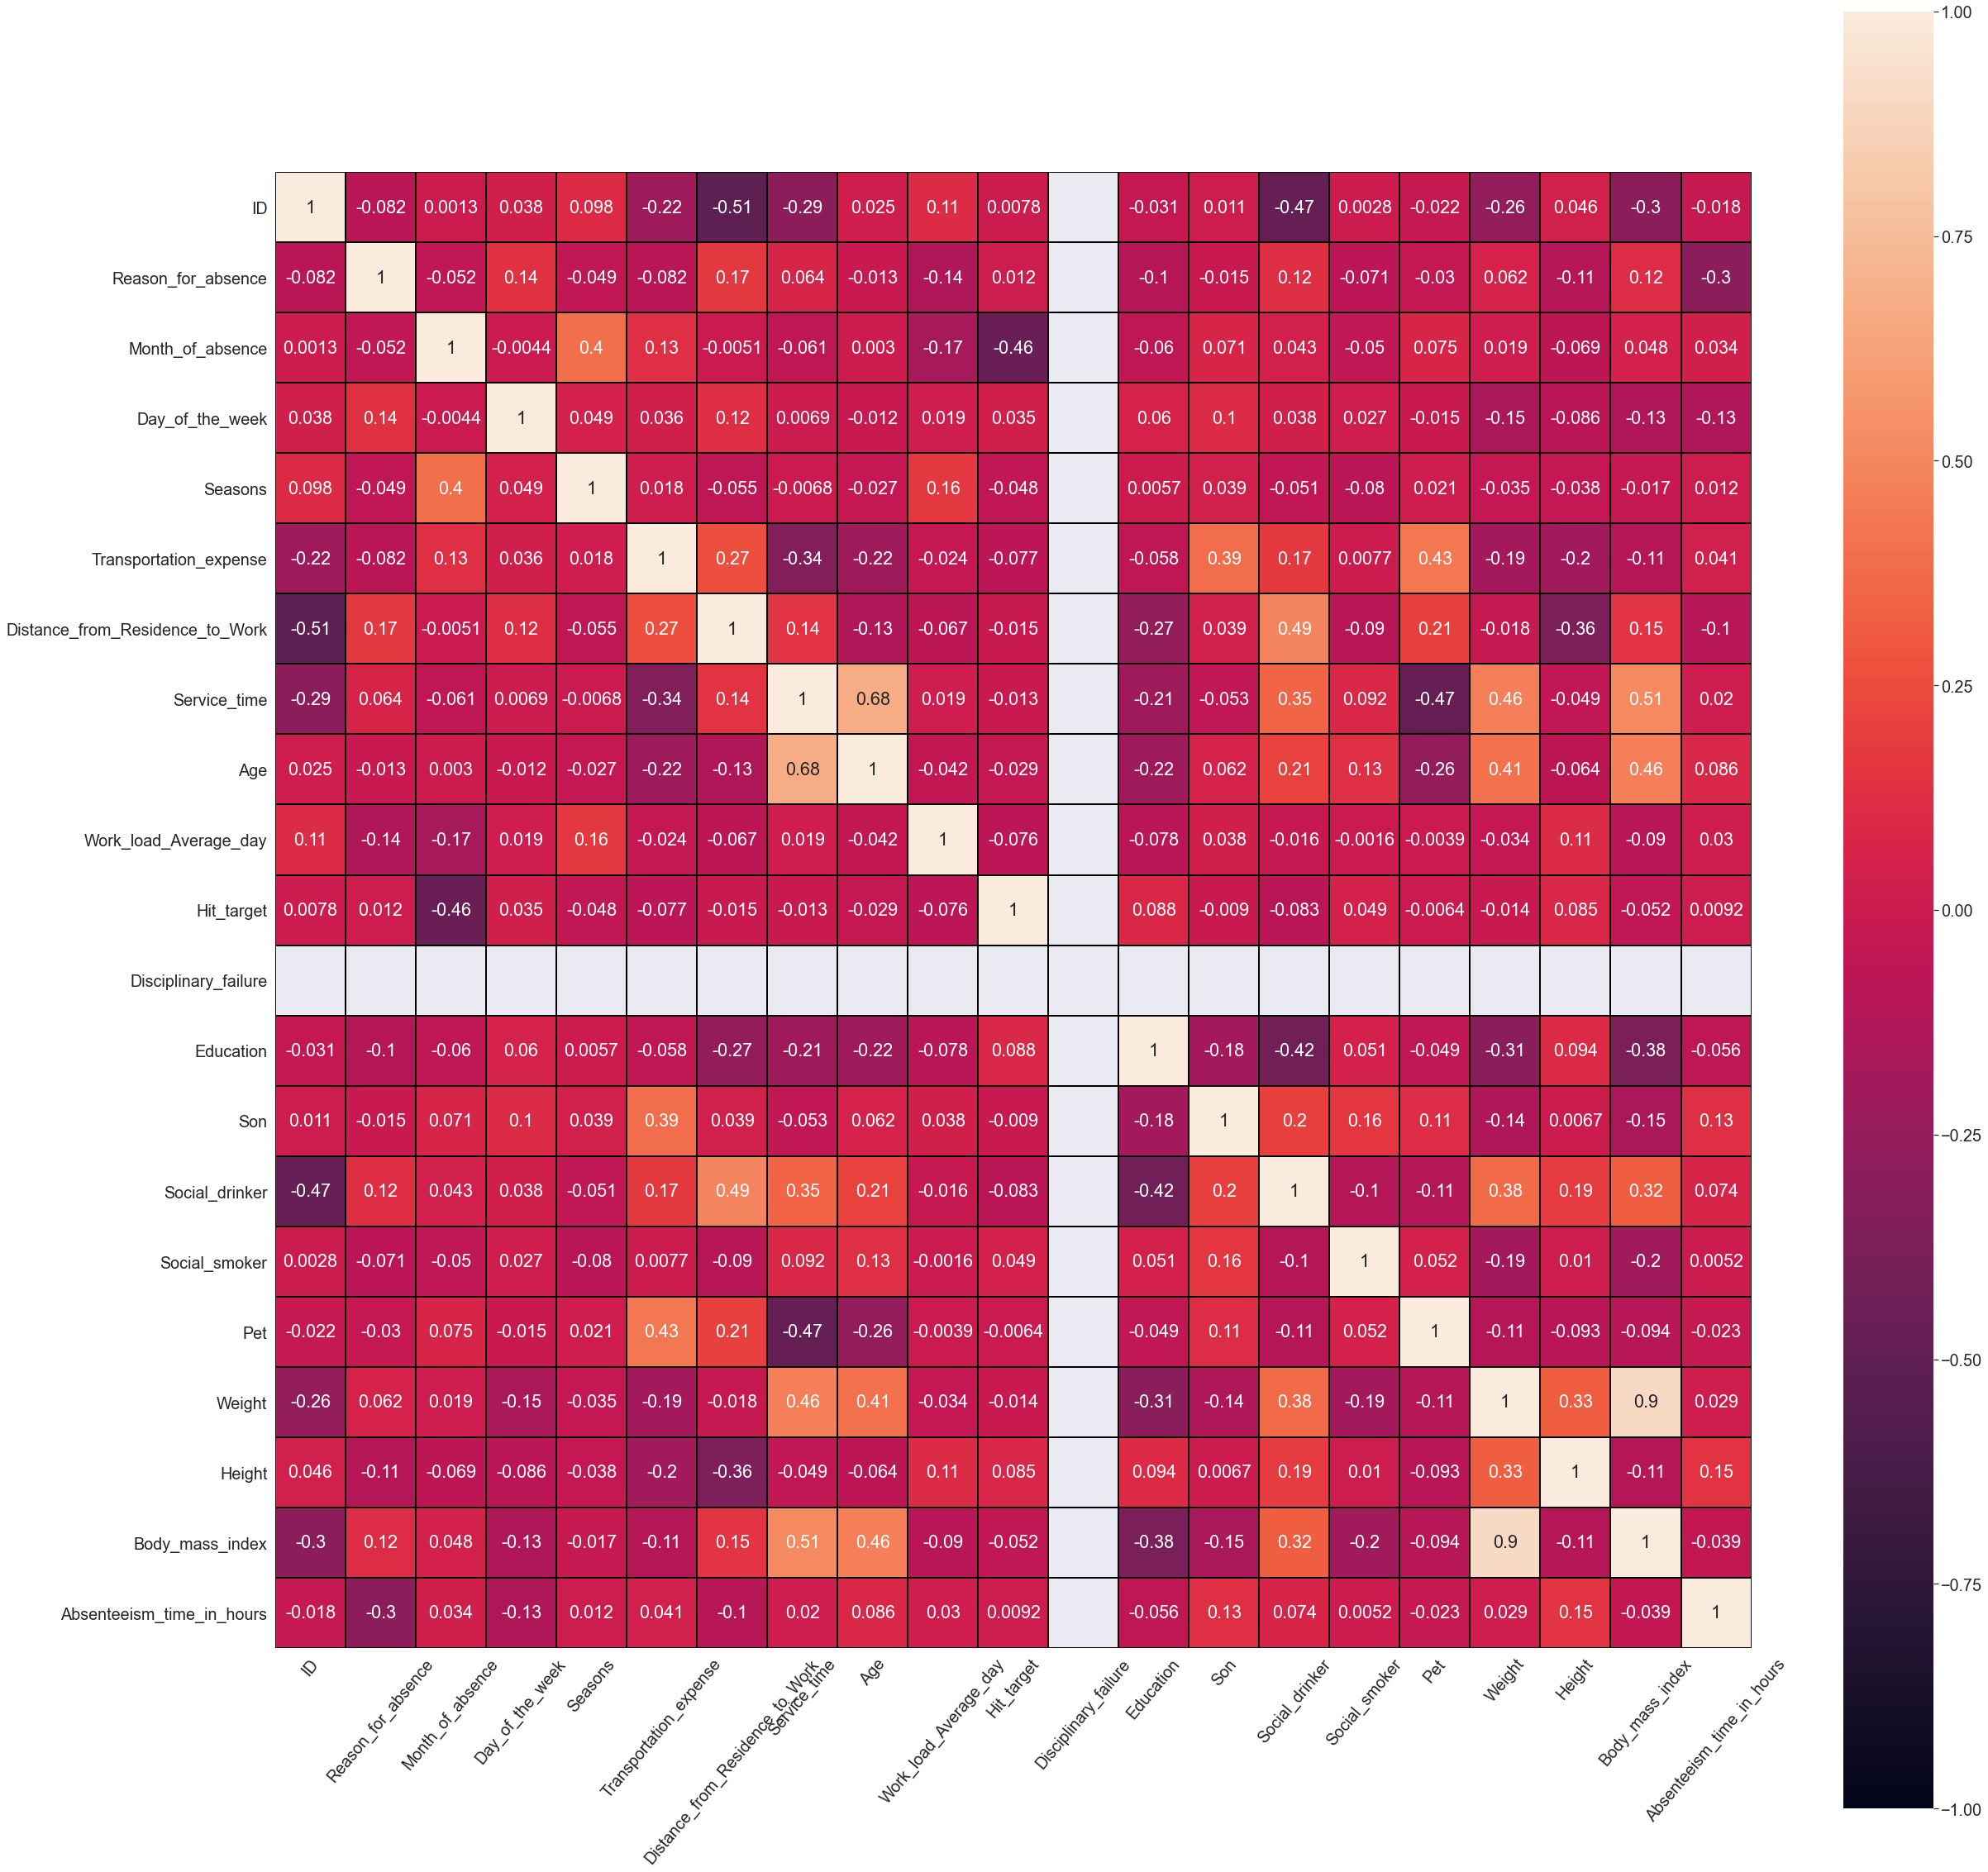

In [36]:
# correlation map
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(40,40) ) #Width,height

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), 
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)
sns.set(font_scale=1.8)
plt.xticks(rotation=50)
plt.show()
#f.savefig('heatmap.png')

No two variables have correlation coeff. > 0.95 so we will not drop any continuous independent variables.

# Relationships of categorical independent variables with dependent variable
    1.'Reason_for_absence' Vs 'Absenteeism_time_in_hours'

In [37]:
def relationship(a,b):
    df = absentism_data.groupby(a)[b].sum().reset_index()
    df[b] = (df[b]*100)/sum(absentism_data[b])
    df = df.sort_values(by='Absenteeism_time_in_hours')
    print(df)
    return df.plot.barh(x=a,y=b, figsize = (12,10))

    Reason_for_absence  Absenteeism_time_in_hours
0                    0                   0.000000
16                  16                   0.117096
17                  17                   0.156128
3                    3                   0.156128
4                    4                   0.175644
15                  15                   0.312256
5                    5                   0.370804
23                  24                   0.468384
2                    2                   0.468384
8                    8                   0.624512
20                  21                   0.683060
24                  25                   2.107728
7                    7                   2.927400
26                  27                   3.064012
14                  14                   3.259173
9                    9                   3.278689
6                    6                   3.337237
1                    1                   3.551913
12                  12                   3.649493


<AxesSubplot:ylabel='Reason_for_absence'>

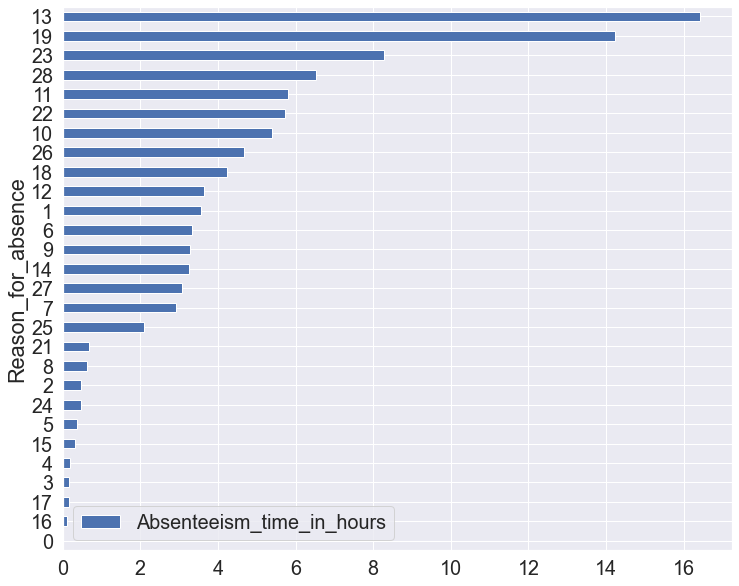

In [38]:
relationship('Reason_for_absence','Absenteeism_time_in_hours')

Top 5 categories in order of Absenteeism_time_in_hours are:

    1. Category 13:Diseases of the musculoskeletal system and connective tissue - 16.43 % of total time

    2. Category 19:Injury, poisoning and certain other consequences of external causes - 14.22 % of total time

    3. Category 23:medical consultation - 11.17 % of total time

    4. Category 28:Dental consultation - 6.53 % 0f total time

Conclusions & possible remedies:

Musculoskeletal system disease is the major reason of absentism. Bad working posture & high workload are possible reasons for the high incidence of musculoskeletal disease. Company should conduct a study on the working postures of people and go for more ergonomic workplace design. Company should try to optimize workload keeping in mind occupational health of working people.

Injury incidence may be reduced by creating proper ergonomic working setup.
Medical consultation may be brought down by optimizing workloads.
Dental consultation time may be reduced by informing employees of the dental health guidelines so that they can take better care of their teeth.

2. 'Month_of_absence' Vs. 'Absenteeism_time_in_hours'

    Month_of_absence  Absenteeism_time_in_hours
0                  0                   0.000000
1                  1                   4.332553
8                  8                   5.620609
9                  9                   5.698673
2                  2                   5.737705
10                10                   6.811085
5                  5                   7.806401
6                  6                   8.021077
12                12                   8.079625
11                11                   9.231069
4                  4                   9.406714
7                  7                  14.324746
3                  3                  14.929742


<AxesSubplot:ylabel='Month_of_absence'>

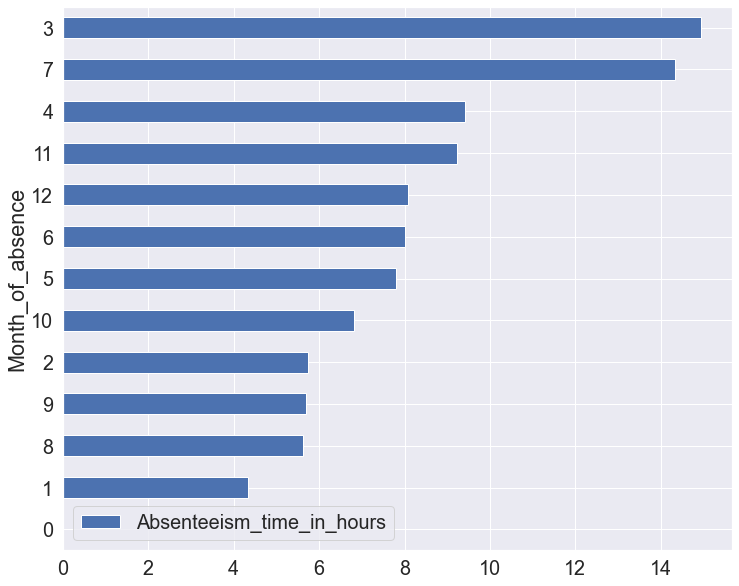

In [39]:
relationship('Month_of_absence','Absenteeism_time_in_hours')

Top 3 months in order of Absenteeism.time.in.hours are:

    Month 3:March - 14.92 % of total time
    Month 7:July - 14.32 % of total time
    Month 4:April - 9.40 % of total time
Clearly March has most Absenteeism, but why do you think that is?

Does it ring any bells? Well, one way to look at it: April is the starting of financial year and hence there might be other employers looking to hire people. Chances are the ones with most absenteeism are pursuing opportunities at other places.

3. 'Day_of_the_week' Vs. 'Absenteeism_time_in_hours'

   Day_of_the_week  Absenteeism_time_in_hours
3                5                  10.792350
4                6                  14.402810
2                4                  21.760343
1                3                  23.985168
0                2                  29.059329


<AxesSubplot:ylabel='Day_of_the_week'>

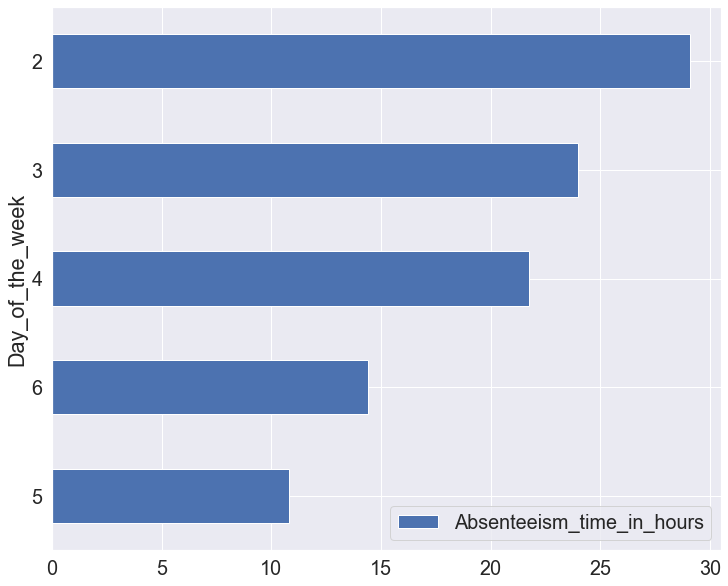

In [40]:
relationship('Day_of_the_week','Absenteeism_time_in_hours')

Top 3 days in order of Absenteeism_time_in_hours time are:

    Day 2:Monday - 29.05 % of total time
    Day 3:Tuesday - 23.98 % of total time
    Day 4:Wednesday - 21.76 % of total time

For features such as "Education", "Son","Pet","Social_smoker","Social_drinker" which are not distributed evenly, we get the absolute value per person.

In [41]:
def relation_abs_pper(a,b):
    df = absentism_data.groupby(a)[b].agg(['sum','count']).reset_index()
    df['abs_per_person'] = df['sum'] / df['count']
    print(df)
    return df.plot.bar(x=a,y='abs_per_person',figsize=(16,12), rot=0)

4. 'Education' Vs. 'Absenteeism_time_in_hours'

   Education   sum  count  abs_per_person
0          1  4393    611        7.189853
1          2   294     46        6.391304
2          3   416     79        5.265823
3          4    21      4        5.250000


<AxesSubplot:xlabel='Education'>

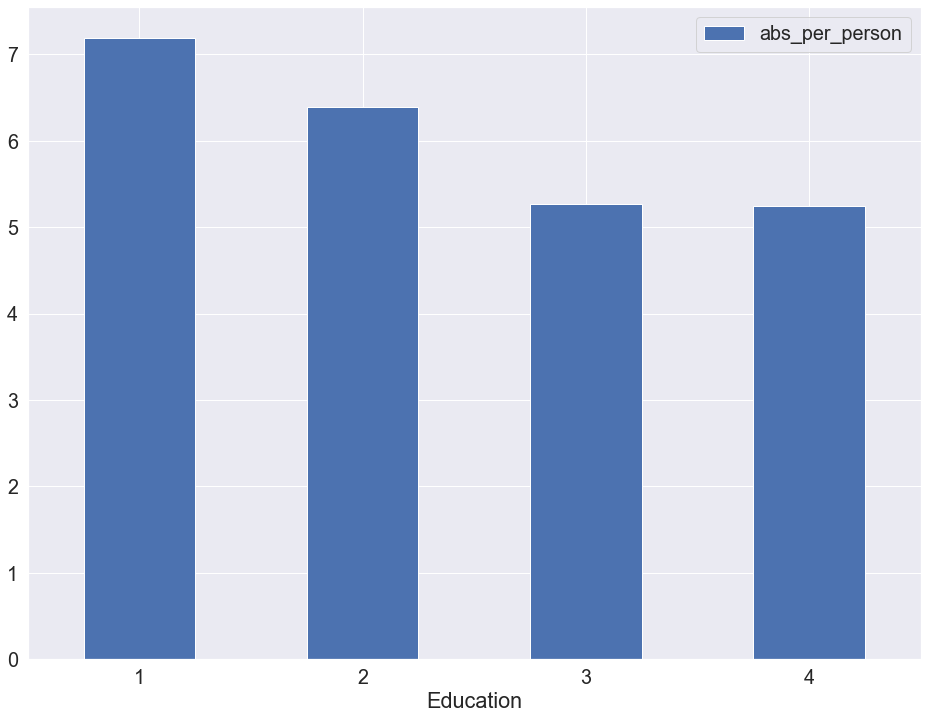

In [42]:
relation_abs_pper('Education','Absenteeism_time_in_hours')

Employees belonging to 1 category in Education are contributing the highest 7.92% absentism compared to other categories.

5.'Son' Vs 'Absenteeism_time_in_hours'

   Son   sum  count  abs_per_person
0    0  1605    298        5.385906
1    1  1381    229        6.030568
2    2  1649    156       10.570513
3    3   183     15       12.200000
4    4   306     42        7.285714


<AxesSubplot:xlabel='Son'>

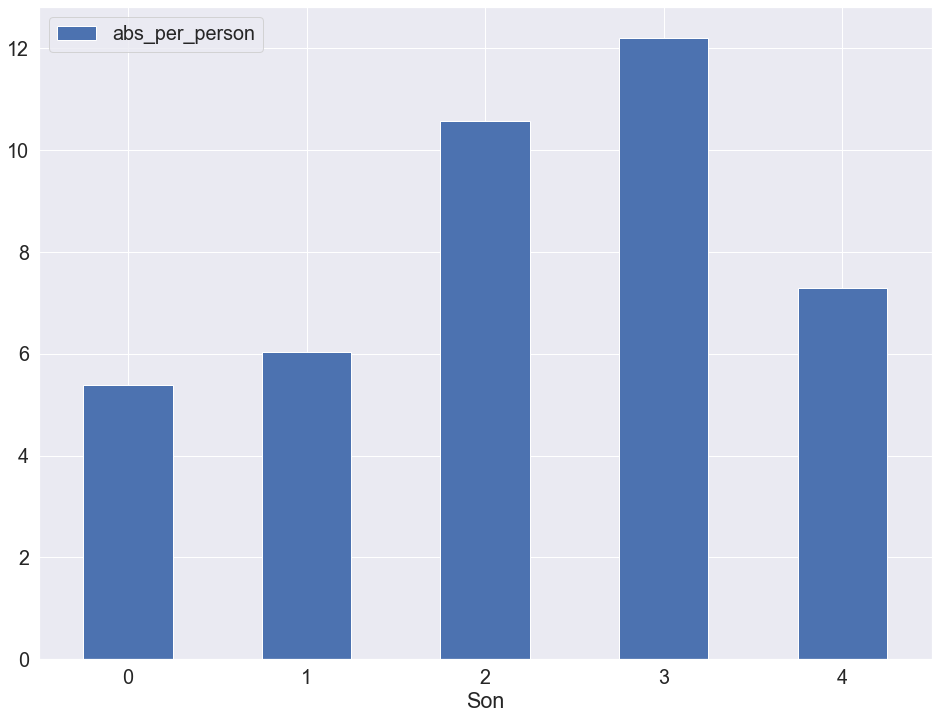

In [43]:
relation_abs_pper('Son','Absenteeism_time_in_hours')

Top 3 categories in order of Absenteeism.time.in.hours are:

    Category 3:Three sons - 12.20 % of total time
    Category 2:Two sons - 10.57 % of total time
    Category 4:Four sons - 7.28 % of total time
Employees having sons > 2 are mostly absent.

6. 'Pet' Vs 'Absenteeism_time_in_hours'

   Pet   sum  count  abs_per_person
0    0  3141    460        6.828261
1    1  1242    138        9.000000
2    2   456     96        4.750000
3    4   226     32        7.062500
4    5    25      6        4.166667
5    8    34      8        4.250000


<AxesSubplot:xlabel='Pet'>

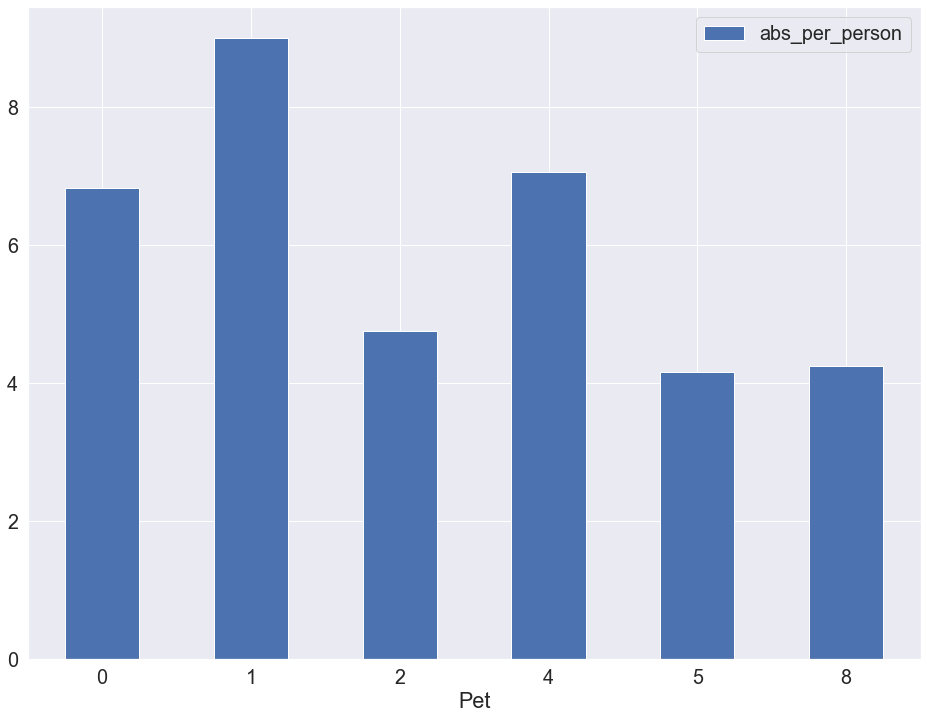

In [44]:
relation_abs_pper('Pet','Absenteeism_time_in_hours')

Top 3 categories in order of Absenteeism.time.in.hours are:

    Category 1:One pet - 9.00 % of total time
    Category 3:Three pet - 7.06 % of total time
    Category 0:No pets - 6.82 % of total time
We can see that employees with more pets are less absent to office as compared to other employees. From this we can infer that, pets make employees happy and that is the reason the absentism is less among them.

7. 'Social drinker' Vs 'Absenteeism_time_in_hours'

   Social_drinker   sum  count  abs_per_person
0               0  1898    320        5.931250
1               1  3226    420        7.680952


<AxesSubplot:xlabel='Social_drinker'>

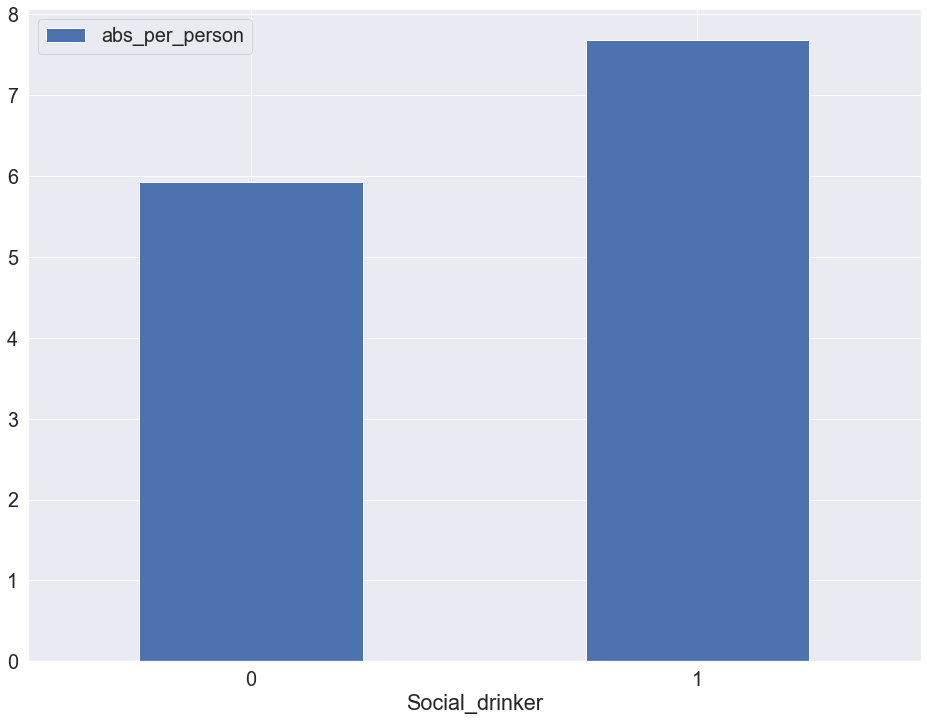

In [45]:
relation_abs_pper('Social_drinker','Absenteeism_time_in_hours')

One way yes, because obviously they have more abs_per_person then the other category. On the other hand, the difference is not too much to make a conclusion. It is in situations like these domain expertise comes in handy. So, as you might have realized there is no correct answer here unless we know for a fact that there is a relation.

8. 'Social_smoker' Vs 'Absenteeism_time_in_hours'

   Social_smoker   sum  count  abs_per_person
0              0  4773    686        6.957726
1              1   351     54        6.500000


<AxesSubplot:xlabel='Social_smoker'>

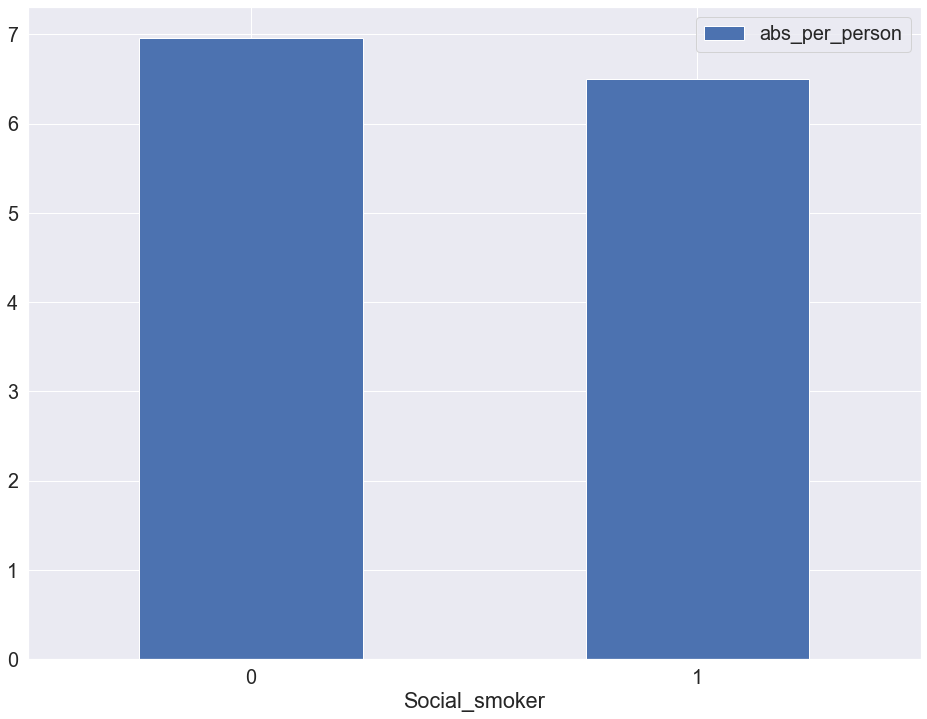

In [46]:
relation_abs_pper('Social_smoker','Absenteeism_time_in_hours')

9. 'Social_Drinker' Vs 'Social_Smoker'

In [47]:
non_teetotaler = pd.crosstab(absentism_data['Social_drinker'],absentism_data['Social_smoker']).apply(lambda x: x/x.sum(),axis=0)

In [48]:
non_teetotaler

Social_smoker,0,1
Social_drinker,,
0,0.41691,0.62963
1,0.58309,0.37037


From this crosstab, we can infer that 58.3% of employees are alcoholics and 62.9% of employees only smoke. About 36% of employees both smoke and drink.

# Inferences from Categorical Variables

    Reason_for_absence from office is mainly due to diseases of the musculoskeletal system and connective tissue.
    March is the month where employees' are mostly absent in office.
    Monday is the Day_of_the_week where employees' are mostly absent.
    Most of the Employees' have studied High School.
    Employees' having 3 sons are mostly absent in office.
    Employees' who have 2 pets are absent to office most of the time.
    Employees who are addicted to alcohol aren't regular to office.
    Those who smoke a lot are regular to office compared to employees' who don't smoke.
    Comparing employees' being are teetotalers contribute to 42% of the data, while only smoking contributes 63% of employees' , only drinking 58.3% and both smoking and drinking contribute 37.03%.

In [49]:
print("Min Service_time of employees' :",min(absentism_data['Service_time']))
print("Max Service_time of employees' :",max(absentism_data['Service_time']))

Min Service_time of employees' : 1
Max Service_time of employees' : 29


In [50]:
absentism_data['service_time_bins'] = pd.cut(absentism_data.Service_time,bins=[0,10,20,30],labels=['Low_service(0-10)','Medium_service(10-20)','High_service(20-30)'])

In [51]:
print("Min weight of employees' :",min(absentism_data['Weight']))
print("Max weight of employees' :",max(absentism_data['Weight']))

Min weight of employees' : 56
Max weight of employees' : 108


In [52]:
absentism_data['weight_bins'] = pd.cut(absentism_data.Weight,bins=[55,75,95,115],labels=['Normal(55-75)','Overweight(75-95)','Obese(95-115)'])

In [53]:
print("Min Height of employees' :",min(absentism_data['Height']))
print("Max weight of employees' :",max(absentism_data['Height']))

Min Height of employees' : 163
Max weight of employees' : 196


In [54]:
absentism_data['height_bins'] = pd.cut(absentism_data.Height,bins=[160,170,180,190,200],labels=['Normal(160-170)','Tall(170-180)','Very Tall(180-190)','Very Very Tall(190-200)'])

In [55]:
print("Min Height of employees' :",min(absentism_data['Body_mass_index']))
print("Max weight of employees' :",max(absentism_data['Body_mass_index']))

Min Height of employees' : 19
Max weight of employees' : 38


In [56]:
absentism_data['BMI_bins'] = pd.cut(absentism_data.Body_mass_index,bins=[15,25,35,45],labels=['Low(15-25)','Medium(25-35)','High(35-45)'])

In [57]:
print("Min Age of employees' :",min(absentism_data['Age']))
print("Max Age of employees' :",max(absentism_data['Age']))

Min Age of employees' : 27
Max Age of employees' : 58


In [58]:
absentism_data['Age_bins'] = pd.cut(absentism_data.Age,bins=[25,35,45,55,65],labels=['Adult(25-35)','Middle-Aged(35-45)','Old Middle Aged(45-55)','Senior Citizen(55-65)'])

In [59]:
print("Min Transportation expense of employees' :",min(absentism_data['Transportation_expense']))
print("Max Transportation expense of employees' :",max(absentism_data['Transportation_expense']))

Min Transportation expense of employees' : 118
Max Transportation expense of employees' : 388


In [60]:
absentism_data['Expense_bins'] = pd.cut(absentism_data.Transportation_expense,bins=[100,200,300,400],labels=['Low(100-200)','Medium(200-300)','High(300-400)'])

In [61]:
print("Min Work_load_Average_day of employees' :",min(absentism_data['Work_load_Average_day']))
print("Max Work_load_Average_day of employees' :",max(absentism_data['Work_load_Average_day']))

Min Work_load_Average_day of employees' : 205917
Max Work_load_Average_day of employees' : 378884


In [62]:
absentism_data['Work_load_bins'] = pd.cut(absentism_data.Work_load_Average_day,bins=[200000,250000,300000,350000,400000],labels=['Low(200K-250K)','Medium(250K-300K)','High(300K-350K)','Very high(350K-400K)'])

In [63]:
print("Min Hit_target :",min(absentism_data['Hit_target']))
print("Max Hit_target :",max(absentism_data['Hit_target']))

Min Hit_target : 81
Max Hit_target : 100


In [64]:
absentism_data['hit_tgt_bins'] = pd.cut(absentism_data.Hit_target,bins=[80,85,90,95,100],labels=['Low_hit_tgt(80-85)','Medium_hit_tgt(85-90)','High_hit_tgt(90-95)','Very_high_hit_tgt(95-100)'])

In [65]:
print("Min Distance_from_Residence_to_Work :",min(absentism_data['Distance_from_Residence_to_Work']))
print("Max Distance_from_Residence_to_Work :",max(absentism_data['Distance_from_Residence_to_Work']))

Min Distance_from_Residence_to_Work : 5
Max Distance_from_Residence_to_Work : 52


In [66]:
absentism_data['distance_bins'] = pd.cut(absentism_data.Distance_from_Residence_to_Work,bins=[5,15,25,35,45,55],labels=['Short_dist(5-15)','Min_distance(15-25)','Normal_dist(25-35)','Long_dist(35-45)','Very_long_dist(45-55)'])

         weight_bins   sum  count  abs_per_person
0      Normal(55-75)  2282    333        6.852853
1  Overweight(75-95)  2411    346        6.968208
2      Obese(95-115)   431     61        7.065574


<AxesSubplot:xlabel='weight_bins'>

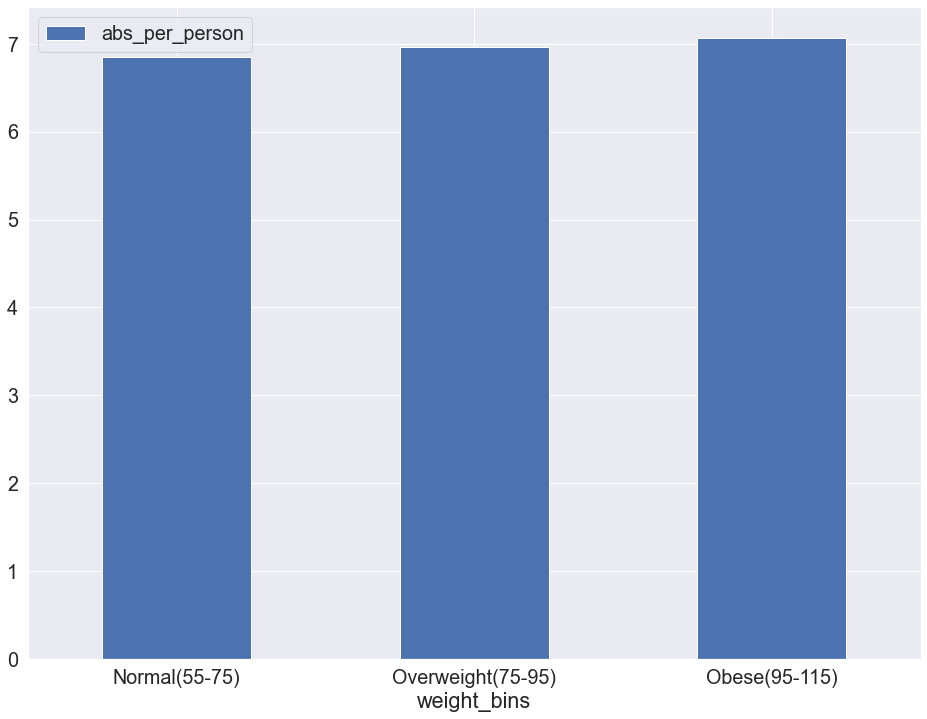

In [67]:
relation_abs_pper('weight_bins','Absenteeism_time_in_hours')

       service_time_bins   sum  count  abs_per_person
0      Low_service(0-10)  1414    255        5.545098
1  Medium_service(10-20)  3678    478        7.694561
2    High_service(20-30)    32      7        4.571429


<AxesSubplot:xlabel='service_time_bins'>

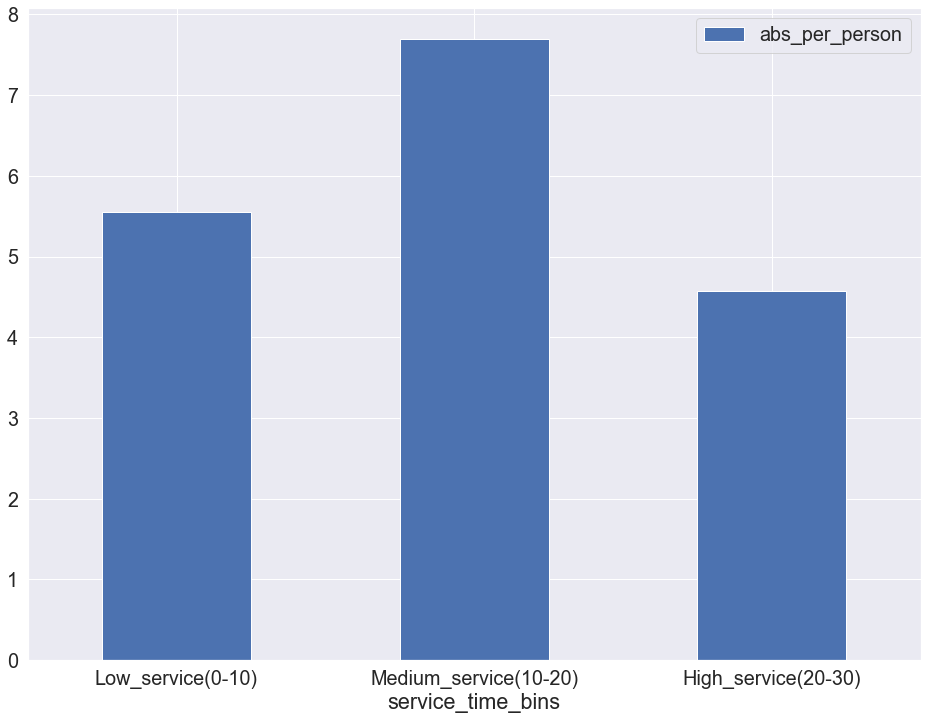

In [68]:
relation_abs_pper('service_time_bins','Absenteeism_time_in_hours')

                 Age_bins   sum  count  abs_per_person
0            Adult(25-35)  2241    292        7.674658
1      Middle-Aged(35-45)  2164    365        5.928767
2  Old Middle Aged(45-55)   457     75        6.093333
3   Senior Citizen(55-65)   262      8       32.750000


<AxesSubplot:xlabel='Age_bins'>

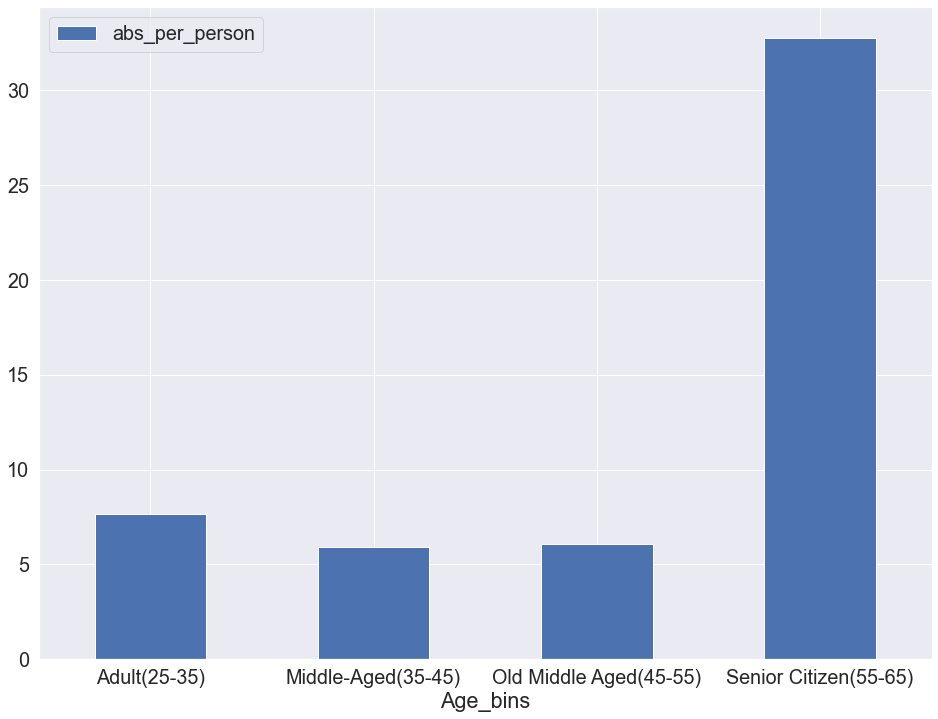

In [69]:
relation_abs_pper('Age_bins','Absenteeism_time_in_hours')

Employees who are Senior Citizens are mostly absent to office. That's a pretty clear difference, isn't it? Take a closer look once again at the table above the graph and get to a conclusion.

surely senior citizens have most absenteeism time. But, when you look at the table above you will notice there are only 8 senior citizens. Since the scales for all age groups is drastically different, we can't exrtapolate the findings to future data without a solid basis.

      Expense_bins   sum  count  abs_per_person
0     Low(100-200)  2138    323        6.619195
1  Medium(200-300)  2443    351        6.960114
2    High(300-400)   543     66        8.227273


<AxesSubplot:xlabel='Expense_bins'>

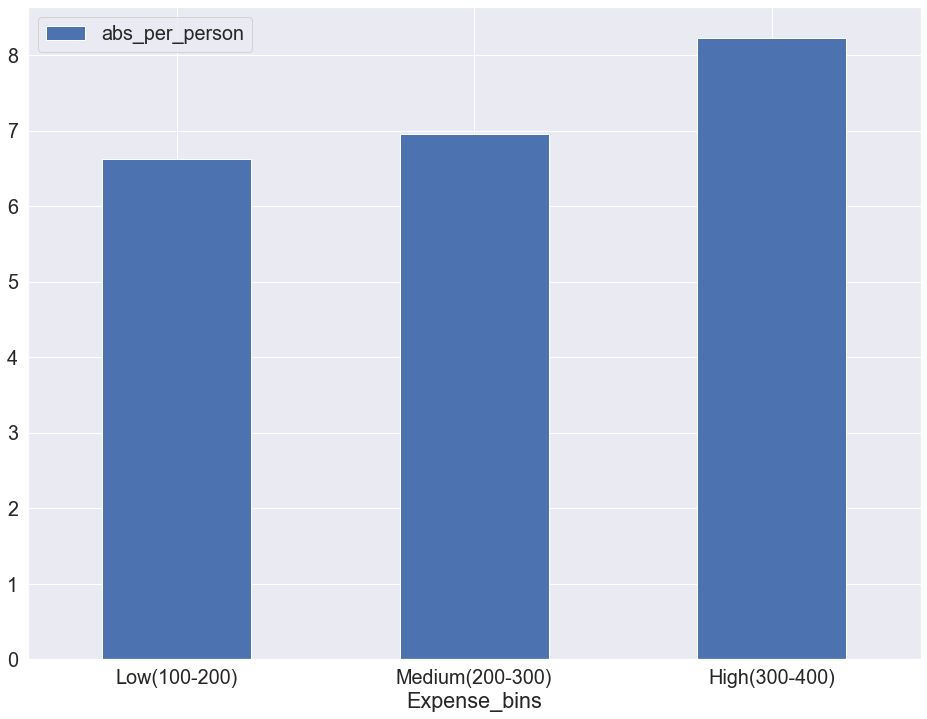

In [70]:
relation_abs_pper('Expense_bins','Absenteeism_time_in_hours')

           distance_bins   sum  count  abs_per_person
0       Short_dist(5-15)  1583    162        9.771605
1    Min_distance(15-25)   900    134        6.716418
2     Normal_dist(25-35)  1064    188        5.659574
3       Long_dist(35-45)   477     48        9.937500
4  Very_long_dist(45-55)  1070    202        5.297030


<AxesSubplot:xlabel='distance_bins'>

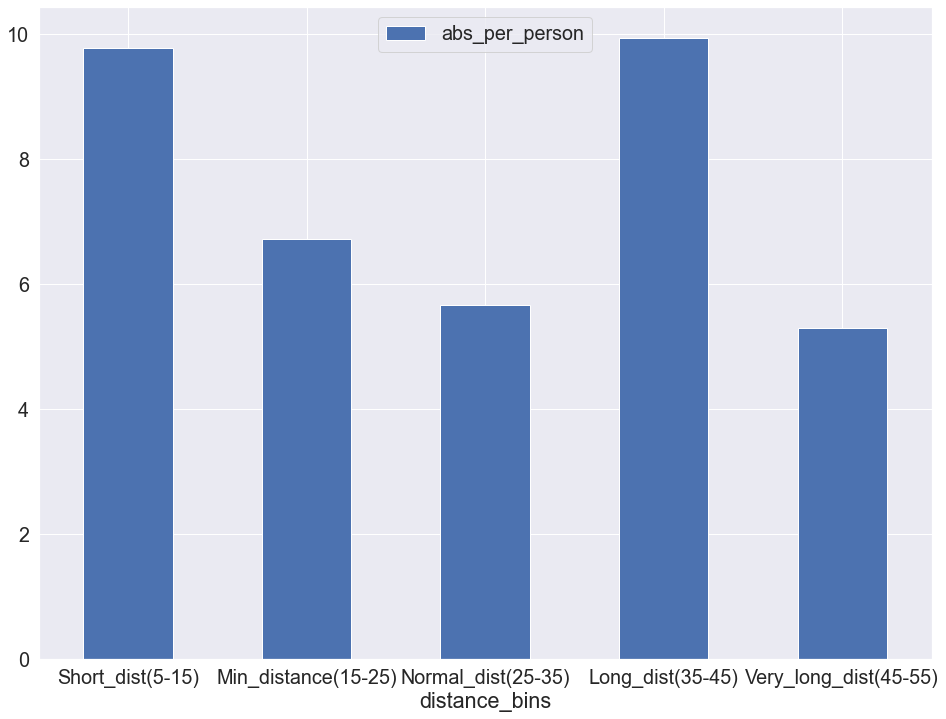

In [72]:
relation_abs_pper('distance_bins','Absenteeism_time_in_hours')

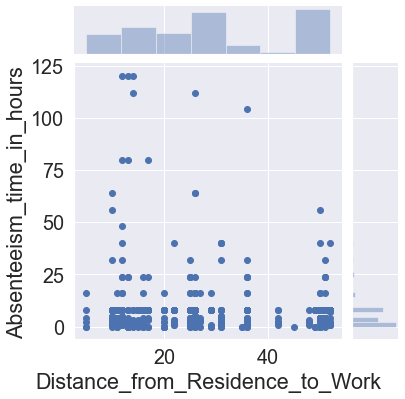

In [71]:
sns.jointplot(x='Distance_from_Residence_to_Work',y='Absenteeism_time_in_hours',data=absentism_data)

This shows that hours of absence has no or very little correlation with Distance from residence to work. why probably little corelation?

Though there isn't any clearly visible pattern, there is a reducing trend going further from workplace and hence the little correlation

         Work_load_bins   sum  count  abs_per_person
0        Low(200K-250K)  1787    255        7.007843
1     Medium(250K-300K)  2110    318        6.635220
2       High(300K-350K)   945    135        7.000000
3  Very high(350K-400K)   282     32        8.812500


<AxesSubplot:xlabel='Work_load_bins'>

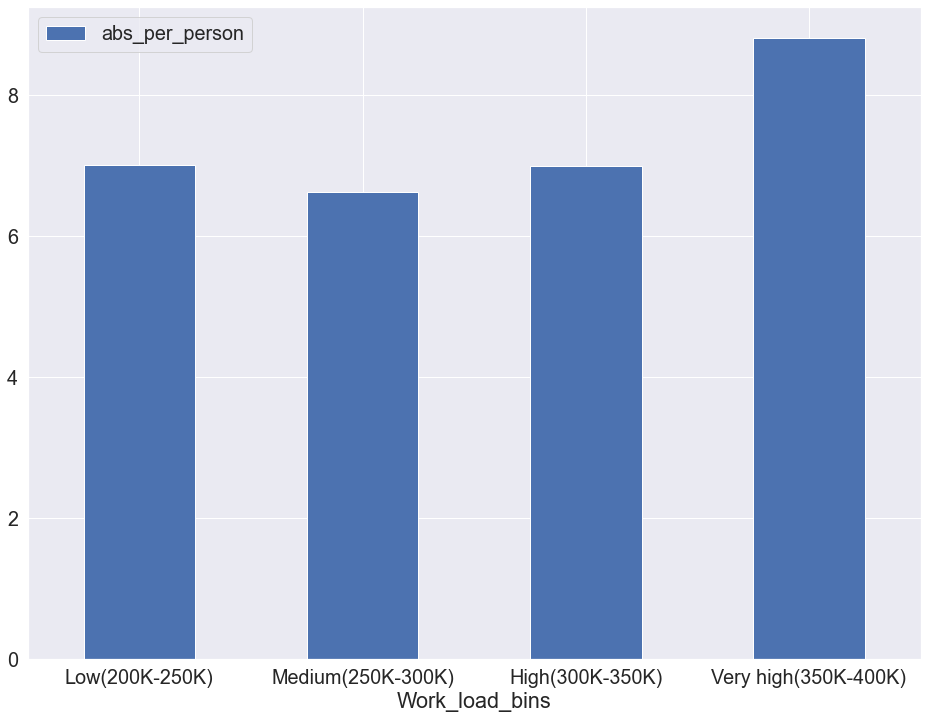

In [73]:
relation_abs_pper('Work_load_bins','Absenteeism_time_in_hours')

Higher work-load implies more absenteeism. Are the employees probably taking off to skip work?

                hit_tgt_bins   sum  count  abs_per_person
0         Low_hit_tgt(80-85)   163     19        8.578947
1      Medium_hit_tgt(85-90)   217     40        5.425000
2        High_hit_tgt(90-95)  2213    338        6.547337
3  Very_high_hit_tgt(95-100)  2531    343        7.379009


<AxesSubplot:xlabel='hit_tgt_bins'>

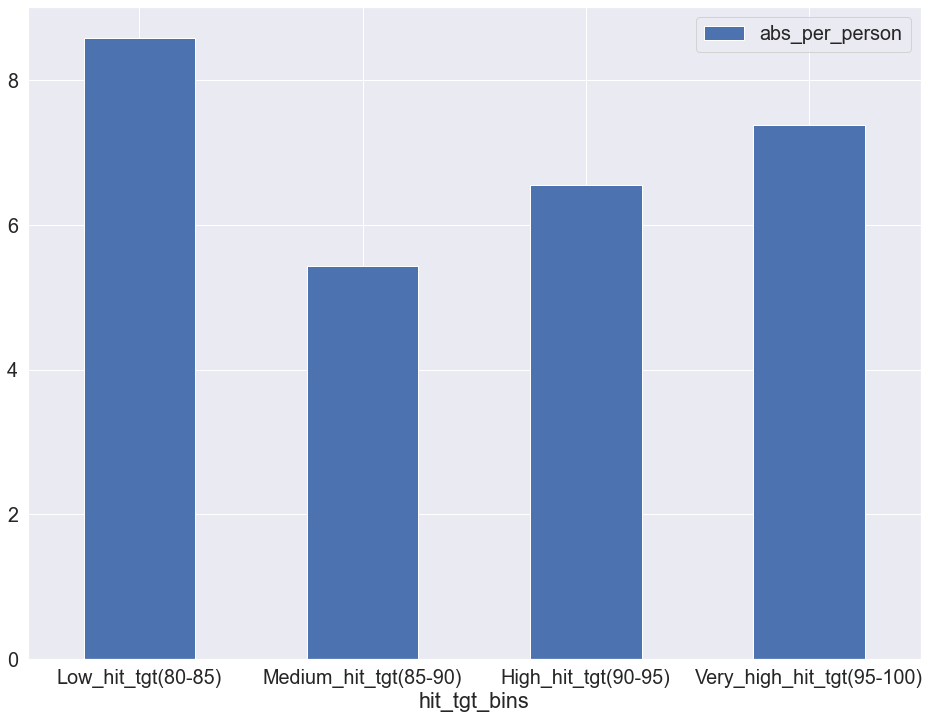

In [74]:
relation_abs_pper('hit_tgt_bins','Absenteeism_time_in_hours')

Employees that fall under "Low_hit_tgt" category are mostly absent followed by "Very_high_hit_tgt" and "High_hit_tgt". Does that mean anything? Can we say employees from "Low_hit_tgt" have higher chance of absenteeism?

Well, it surely is possible but we can't infer that from the above graph because: "Correlation doesn't imply causation, remember?"

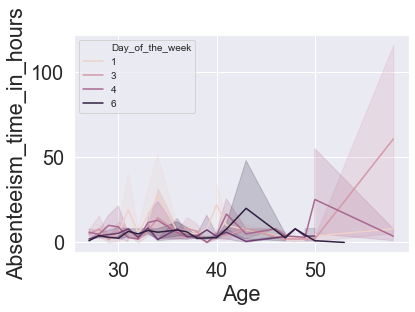

<Figure size 864x864 with 0 Axes>

In [75]:
sns.lineplot(x='Age',y='Absenteeism_time_in_hours',hue='Day_of_the_week', markers=True, data=absentism_data)
plt.legend(loc=2, prop={'size': 10})
plt.figure(figsize=(12,12))
plt.show()

# Inferences from the EDA of continous variables:-
    1. The employees' who are Obese are mostly absent to office.
    2. Majority of the employees who range in the medium service time(10-20) are absent.
    3. Senior Citizens are mostly absent to office.
    4. Employees' having 'High Transport Expense' are mostly absent in work.
    5. Employees' whose residence is farther from Office are absent in office.
    6. Employees' having Very high work load average day are absent in time in hours.
    7. Those who have 'Low hit target' are absent to office in time in hours.
    8. Also, we can infer that Employees are mostly absent on Day 6-Friday at work.
    9. While comparing 'Transportation_expense' with that of 'Distance_from_residence_to_work' , employees' having farther distance have more expense, shorter distance have less expense and medium distance have min. expense.

Note :- The Columns 'Seasons','Reason_of_absence','Son','Education','Pet' have the p-values (< 0.05) which reject the null hypothesis. We can drop these columns as well.

In [76]:
absentism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason_for_absence               740 non-null    int64   
 2   Month_of_absence                 740 non-null    int64   
 3   Day_of_the_week                  740 non-null    int64   
 4   Seasons                          740 non-null    int64   
 5   Transportation_expense           740 non-null    int64   
 6   Distance_from_Residence_to_Work  740 non-null    int64   
 7   Service_time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work_load_Average_day            740 non-null    int64   
 10  Hit_target                       740 non-null    int64   
 11  Disciplinary_failure             740 non-null    int64   
 12  Educatio

In [77]:
# Considering the features which are required and dropping the other cols
absentism_data = absentism_data.drop(['distance_bins','hit_tgt_bins','Work_load_bins','Expense_bins','Age_bins','BMI_bins','height_bins','weight_bins','service_time_bins','ID','Disciplinary_failure'],axis=1)

In [78]:
cols = ['Reason_for_absence','Month_of_absence','Seasons','Day_of_the_week','Transportation_expense','Distance_from_Residence_to_Work','Service_time','Age','Work_load_Average_day','Hit_target','Education','Son','Social_drinker','Social_smoker','Pet','Body_mass_index','Absenteeism_time_in_hours']

In [79]:
final_df = absentism[cols]

In [80]:
final_df.head()

,Reason_for_absence,Month_of_absence,Seasons,Day_of_the_week,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Education,Son,Social_drinker,Social_smoker,Pet,Body_mass_index,Absenteeism_time_in_hours
0,26,7,1,3,289,36,13,33,239554,97,1,2,1,0,1,30,4
2,23,7,1,4,179,51,18,38,239554,97,1,0,1,0,0,31,2
3,7,7,1,5,279,5,14,39,239554,97,1,2,1,1,0,24,4
4,23,7,1,5,289,36,13,33,239554,97,1,2,1,0,1,30,2
5,23,7,1,6,179,51,18,38,239554,97,1,0,1,0,0,31,2


In [81]:
final_df.columns

Index(['Reason_for_absence', 'Month_of_absence', 'Seasons', 'Day_of_the_week',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average_day', 'Hit_target',
       'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet',
       'Body_mass_index', 'Absenteeism_time_in_hours'],
      dtype='object')

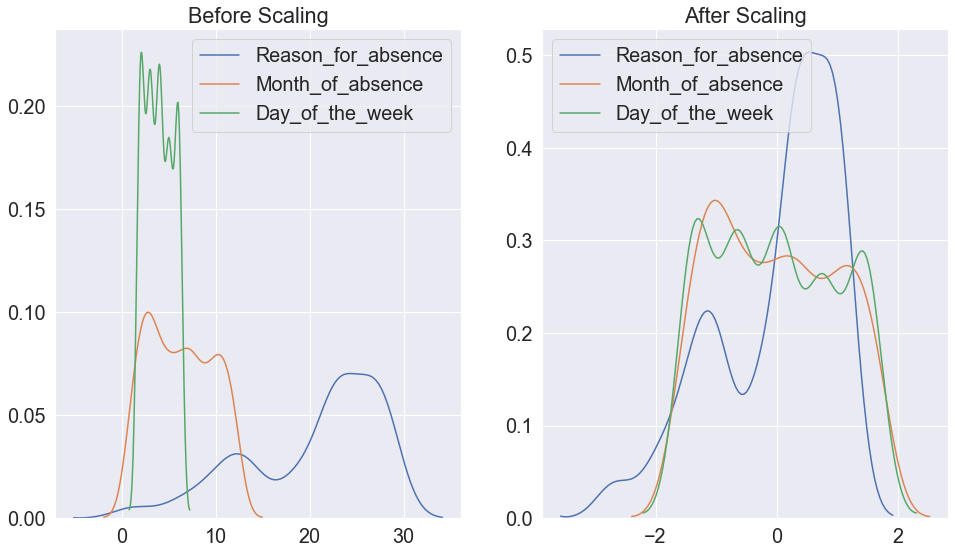

In [82]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(final_df)
scaled_df = pd.DataFrame(scaled_df, columns = final_df.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,9))

ax1.set_title("Before Scaling")
sns.kdeplot(final_df['Reason_for_absence'], ax=ax1)
sns.kdeplot(final_df['Month_of_absence'], ax=ax1)
sns.kdeplot(final_df['Day_of_the_week'], ax=ax1)
ax1.legend(loc="upper right")

ax2.set_title("After Scaling")
sns.kdeplot(scaled_df['Reason_for_absence'], ax=ax2)
sns.kdeplot(scaled_df['Month_of_absence'], ax=ax2)
sns.kdeplot(scaled_df['Day_of_the_week'], ax=ax2)
ax2.legend(loc="upper left")
plt.show()

No handles with labels found to put in legend.


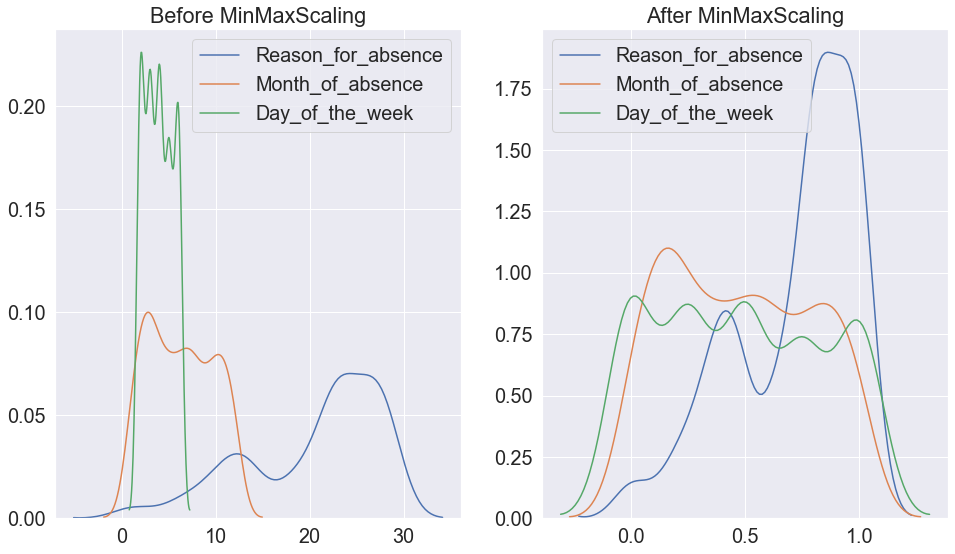

In [83]:
min_max_scaler = MinMaxScaler()
minmax_df = min_max_scaler.fit_transform(final_df)
minmax_df = pd.DataFrame(minmax_df, columns = final_df.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,9))

ax1.set_title("Before MinMaxScaling")
sns.kdeplot(final_df['Reason_for_absence'], ax=ax1)
sns.kdeplot(final_df['Month_of_absence'], ax=ax1)
sns.kdeplot(final_df['Day_of_the_week'], ax=ax1)
plt.legend(loc='upper right')

ax2.set_title("After MinMaxScaling")
sns.kdeplot(minmax_df['Reason_for_absence'], ax=ax2)
sns.kdeplot(minmax_df['Month_of_absence'], ax=ax2)
sns.kdeplot(minmax_df['Day_of_the_week'], ax=ax2)
plt.legend(loc='upper left')
plt.show()

After applying the scaling technique to the model. Let us now seperate the features from the target, by using X and Y dataframes respectively.

In [84]:
Y = scaled_df["Absenteeism_time_in_hours"]

In [85]:
X = scaled_df.iloc[:,:16]

# Applying Statsmodel


In [86]:
X_constant = sm.add_constant(X)

add_constant adds a column of ones to an array

In [87]:
model = sm.OLS(Y,X_constant)
lin_reg = model.fit()

In [88]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism_time_in_hours   R-squared:                       0.144
Model:                                   OLS   Adj. R-squared:                  0.124
Method:                        Least Squares   F-statistic:                     7.130
Date:                       Sun, 11 Oct 2020   Prob (F-statistic):           2.04e-15
Time:                               16:28:00   Log-Likelihood:                -933.53
No. Observations:                        696   AIC:                             1901.
Df Residuals:                            679   BIC:                             1978.
Df Model:                                 16                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.337e-18      0.036   1.22e-16      1.000      -0.070       0.070
Reason_for_absence                 -0.2840      0.037     -7.576      0.000      -0.358      -0.210
Month_of_absence                    0.0243      0.048      0.510      0.610      -0.069       0.118
Seasons                            -0.0082      0.041     -0.199      0.843      -0.090       0.073
Day_of_the_week                    -0.1005      0.037     -2.715      0.007      -0.173      -0.028
Transportation_expense             -0.0092      0.047     -0.198      0.843      -0.101       0.082
Distance_from_Residence_to_Work    -0.1100      0.049     -2.245      0.025      -0.206      -0.014
Service_time                        0.0226      0.065      0.345      0.730      -0.106       0.151
Age                                 0.0606      0.055      1.100      0.272      -0.048       0.169
Work_load_Average_day              -0.0186      0.040     -0.470      0.639      -0.097       0.059
Hit_target                          0.0393      0.042      0.938      0.349      -0.043       0.122
Education                          -0.0572      0.043     -1.333      0.183      -0.142       0.027
Son                                 0.0924      0.042      2.190      0.029       0.010       0.175
Social_drinker                      0.1348      0.048      2.805      0.005       0.040       0.229
Social_smoker                      -0.0522      0.039     -1.340      0.181      -0.129       0.024
Pet                                 0.0134      0.047      0.287      0.774      -0.078       0.105
Body_mass_index                    -0.1040      0.050     -2.098      0.036      -0.201      -0.007
==============================================================================
Omnibus:                      743.501   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35524.691
Skew:                           5.116   Prob(JB):                         0.00
Kurtosis:                      36.471   Cond. No.                         3.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
print(lin_reg.predict(X_constant[:10]))

0   -0.025416
1   -0.203075
2    0.809321
3   -0.046982
4   -0.343667
5   -0.283063
6    0.133110
7    0.647537
8   -0.058563
9    1.287147
dtype: float64


In [90]:
# Let's try using the r2_score to see the importance of features
print(r2_score(Y, lin_reg.predict(X_constant)))

0.1438501034027283


The R2 score that we got above is 0.1438 and now this will serve as the benchmark. If the removal of a feature changes the R2 score significantly then that feature can be termed as an important feature.

In [91]:
# Without Day_of_the_week
lin_reg = smf.ols(formula = 'Y ~ Reason_for_absence + Month_of_absence + Seasons + Transportation_expense + Distance_from_Residence_to_Work + Service_time + Age + Work_load_Average_day + Hit_target + Education + Son + Social_drinker + Social_smoker + Pet + Body_mass_index ', data = X)
base = lin_reg.fit()
print(r2_score(Y, base.predict(X)))

0.1345533788117731


In [92]:
# Without Age
lin_reg = smf.ols(formula = 'Y ~ Reason_for_absence + Month_of_absence + Seasons + Day_of_the_week + Transportation_expense + Distance_from_Residence_to_Work + Service_time + Work_load_Average_day + Hit_target + Education + Son + Social_drinker + Social_smoker + Pet + Body_mass_index ', data = X)
base = lin_reg.fit()
print(r2_score(Y, base.predict(X)))

0.14232412205043288


Inferences :- Removal of 'Day_of_the_week' feature has caused some change by reducing the score to 0.1345. However, removal of 'Age' column didn't cause any major difference as the score remained 0.1423.

In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [94]:
df_param = pd.DataFrame()


In [95]:
# instantiate
linreg = LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [96]:
print('Intercept coefficient :',linreg.intercept_)
df_param['Linear_Regression'] = linreg.coef_

Intercept coefficient : 0.0004984946267147742


In [97]:
y_pred = linreg.predict(X_test)

In [98]:
print("Mean Squared Error",mean_squared_error(Y_test,y_pred))

Mean Squared Error 0.6163067565832724


In [99]:
print("Residual sum of squares: %.2f"%np.mean((linreg.predict(X_test) - Y_test) ** 2))


Residual sum of squares: 0.62


In [100]:
# Ridge
l_ridge = Ridge(alpha=0.5)
l_ridge.fit(X_train,Y_train)

Ridge(alpha=0.5)

In [101]:
print('Intercept Coefficient : ',l_ridge.intercept_)
df_param['Ridge'] = l_ridge.coef_

Intercept Coefficient :  0.0004880121825332458


In [102]:
y_ridge_pred = l_ridge.predict(X_test)

In [103]:
print("Mean Squared Error: ",mean_squared_error(Y_test, y_ridge_pred))
print("Residual sum of squares: %.2f"%np.mean((l_ridge.predict(X_test) - Y_test) ** 2))

Mean Squared Error:  0.6160362781556986
Residual sum of squares: 0.62


In [104]:
# Lasso
l_lasso = Lasso(alpha=0.1)
l_lasso.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [105]:
print('Intercept Coefficient : ',l_lasso.intercept_)
df_param['Lasso'] = l_lasso.coef_

Intercept Coefficient :  0.0029780433464318655


In [106]:
y_lasso_pred = l_lasso.predict(X_test)

In [107]:
print("Mean Squared Error: ",mean_squared_error(Y_test,y_lasso_pred))
print("Residual sum of squares: %.2f"%np.mean((l_lasso.predict(X_test) - Y_test) ** 2))

Mean Squared Error:  0.5798597529710285
Residual sum of squares: 0.58


In [108]:
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False]}
grid = GridSearchCV(linreg, params , cv=None, scoring = 'neg_mean_squared_error')
grid.fit(X_train,Y_train)
print("Mean Squared Error: ",grid.best_score_)
print("Residual sum of squares: %.2f"%np.mean((grid.predict(X_test) - Y_test) ** 2))
l_reg = grid.best_estimator_
print(l_reg)

Mean Squared Error:  -1.0273341816646235
Residual sum of squares: 0.62
LinearRegression(fit_intercept=False, normalize=True)


In [109]:
params={'alpha':[25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid = GridSearchCV(l_ridge, params , cv=2, scoring = 'neg_mean_squared_error')
grid.fit(X_train,Y_train)
print("Mean Squared Error: ",grid.best_score_)
print("Residual sum of squares: %.2f"%np.mean((grid.predict(X_test) - Y_test) ** 2))
l_ridge = grid.best_estimator_
print(l_ridge)

Mean Squared Error:  -1.1051020270451377
Residual sum of squares: 0.61
Ridge(alpha=25)


In [110]:
params={'alpha':[25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid = GridSearchCV(l_lasso, params, cv=2, scoring = 'neg_mean_squared_error')
grid.fit(X_train,Y_train)
print("Mean Squared Error: ",grid.best_score_)
print("Residual sum of squares: %.2f"%np.mean((grid.predict(X_test) - Y_test) ** 2))
l_lasso = grid.best_estimator_
print(l_lasso)

Mean Squared Error:  -1.053881442230234
Residual sum of squares: 0.58
Lasso(alpha=0.1)


In [111]:
max_coef = max(df_param['Linear_Regression'])
df_param[df_param['Linear_Regression'] == max_coef]

,Linear_Regression,Ridge,Lasso
12,0.143041,0.142728,0.0


In [112]:
scoring = {'neg_mean_absolute_error',
           'neg_mean_squared_error',
           'r2'}

df_scores = pd.DataFrame()
for model in [linreg, l_ridge, l_lasso]:
    scores = cross_validate(linreg, X_train, Y_train, scoring=scoring, cv=5, return_train_score=True )
    score = []
    for key in scores.keys():
        score.append(scores[key].mean())
    df_scores[str(model)] = score
    df_scores['metric_params'] = scores.keys()
df_scores = df_scores.set_index('metric_params')

In [113]:
df_scores.columns = ["Linear_Reg","Ridge","Lasso"]

In [114]:
df_scores

,Linear_Reg,Ridge,Lasso
metric_params,,,
fit_time,0.003192,0.002787,0.003179
score_time,0.003197,0.003396,0.002396
test_neg_mean_squared_error,-1.029574,-1.029574,-1.029574
train_neg_mean_squared_error,-0.934534,-0.934534,-0.934534
test_neg_mean_absolute_error,-0.489746,-0.489746,-0.489746
train_neg_mean_absolute_error,-0.462477,-0.462477,-0.462477
test_r2,0.070418,0.070418,0.070418
train_r2,0.160578,0.160578,0.160578
